# Suppose we're selecting players for the baseball Hall of Fame

# We'll include any player with a "real" batting average of 0.300 or higher

# *We want to include as many players as possible, but we want to be sure no players are there by chance*
### *(i.e. they had a lucky streak of at bats, so their observed batting average is above 0.300 but their "real" (intrinsic) batting average is below)*


# To solve this problem, we'll use **False Discovery Rate Control**

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [20,12]
plt.style.use('fivethirtyeight')

from scipy.stats import beta
import numpy as np

In [2]:
df_BA = pd.read_csv('df_BA.csv', index_col = 0)

#from the last notebook, recall:
a, b = 117.98357784382168, 318.54678927619267

df_BA['alpha1'] = df_BA['H'] + a
df_BA['beta1'] = df_BA['AB'] - df_BA['H'] + b

### Consider Hank Aaron

In [3]:
df_BA[df_BA['Name']=='Hank Aaron']

,playerID,Name,AB,H,average,Empirical Bayes Estimate,alpha1,beta1
0,aaronha01,Hank Aaron,12364,3771,0.304998,0.303814,3888.983578,8911.546789


# His observed batting average is 0.305, and his shrunken empirical Bayes batting average is 0.304

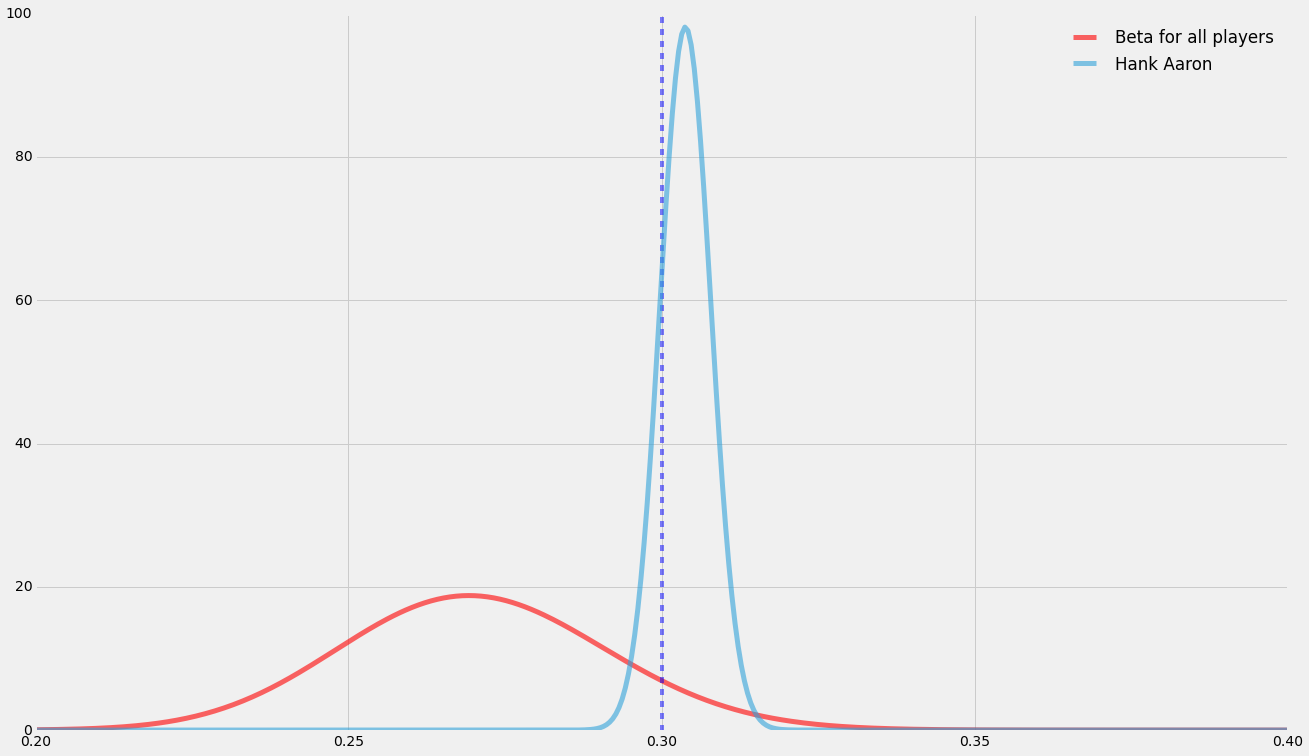

In [4]:
x = np.linspace(0.1,0.6,1000)
plt.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6, label='Beta for all players')

#plotting the posterior beta distributions for the first 5 players
a1 = df_BA.loc[0]['alpha1']
b1 = df_BA.loc[0]['beta1']
plt.axvline(0.3, ls = 'dashed', alpha = 0.5)
plt.plot(x, beta.pdf(x, a1, b1),lw=5, alpha=0.6, label='Hank Aaron')

plt.ylim([-0.1, 100])
plt.xlim([0.2, 0.4])
plt.legend()
plt.show()

# As we can see from the chart above, the majority of Hank Aaron's emipirical Beta dist'n lies above 0.300, *but not all of it*

## The *Posterior Error Probability* for Hank Aaron represents the chance that his "real" batting average is actually less than 0.300

### We calculate the PEP for Hank Aaron as the area under the curve that lies to the left of the dotted line

In [5]:
beta.cdf(0.3, a1, b1)

0.17411245858688038

### Therefore there's a 17.4% chance that he doesn't deserve to be in the Hall of Fame

# Let's look at the other players

In [6]:
df_BA['PEP'] = df_BA.apply(lambda x: beta.cdf(0.3, x['alpha1'], x['beta1']), axis = 1)

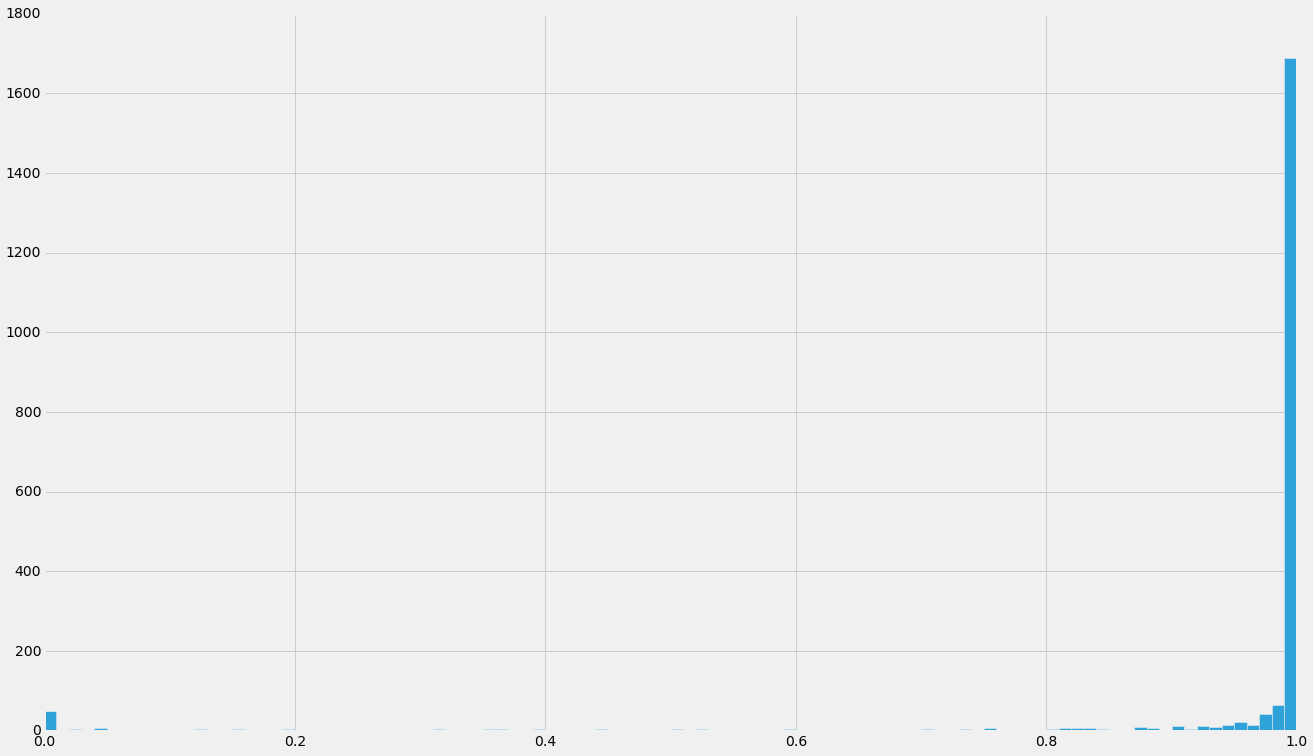

In [7]:
df_BA['PEP'].hist(bins = 100)

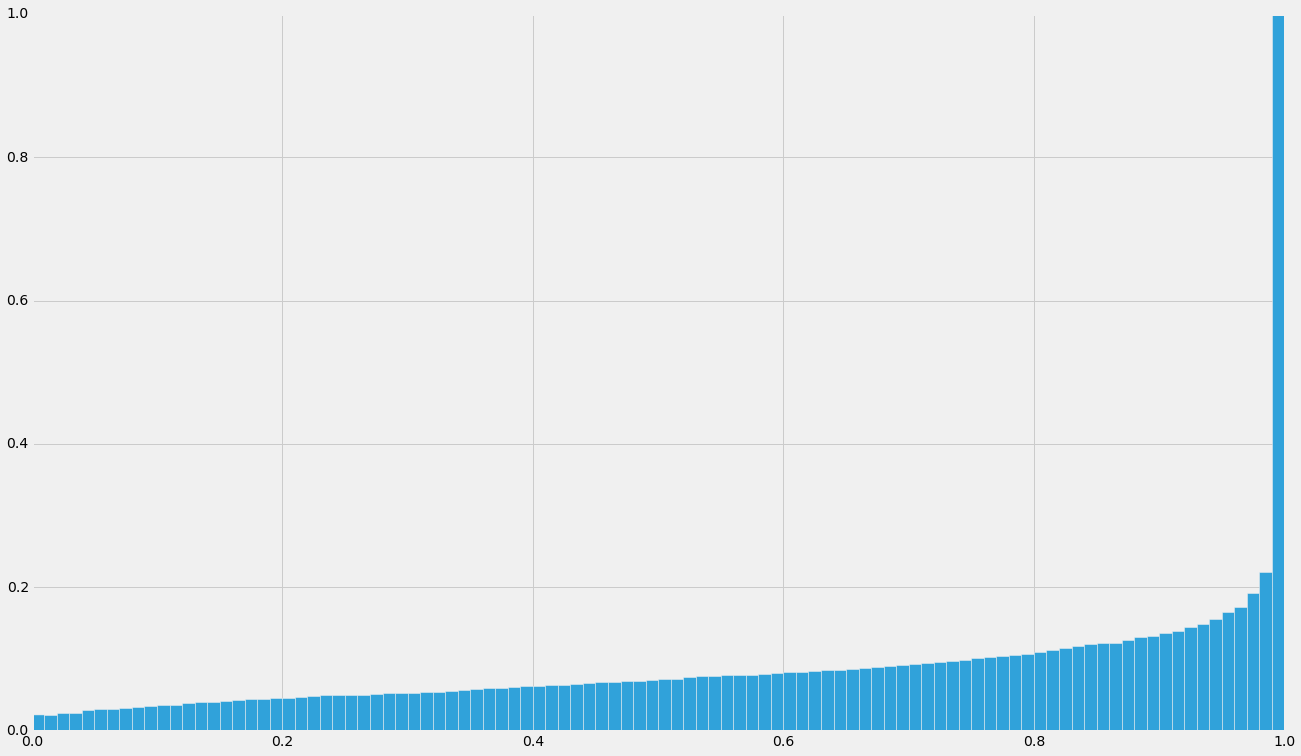

In [8]:
df_BA['PEP'].hist(bins = 100, cumulative = True, normed = True)

### From the chart above, we can see that around 80% of the players DO NOT deserve to be in the Hall of Fame

#### In other words, 100% of their Beta distribution is to the left of 0.300

### Let's look at players that have around a 50% chance of deserving a spot in the Hall of Fame

In [9]:
df_BA[(df_BA['PEP']>0.49)&(df_BA['PEP']<0.51)]

,playerID,Name,AB,H,average,Empirical Bayes Estimate,alpha1,beta1,PEP
3324,greenmi01,Mike Greenwell,4623,1400,0.302834,0.300025,1517.983578,3541.546789,0.500108
3829,highadi01,Dick Higham,1787,549,0.307219,0.299966,666.983578,1556.546789,0.503857
3935,holloch01,Charlie Hollocher,2936,894,0.304496,0.300067,1011.983578,2360.546789,0.498633
4807,larkihe01,Henry Larkin,4718,1429,0.302883,0.300121,1546.983578,3607.546789,0.494044
6459,orsater01,Ernie Orsatti,2165,663,0.306236,0.300202,780.983578,1820.546789,0.493323
8725,troskha01,Hal Trosky,5161,1561,0.302461,0.299951,1678.983578,3918.546789,0.504758
9057,webbea01,Earl Webb,2161,661,0.305877,0.299894,778.983578,1818.546789,0.506985


** Notice that all these players have a batting average right around 0.300 **

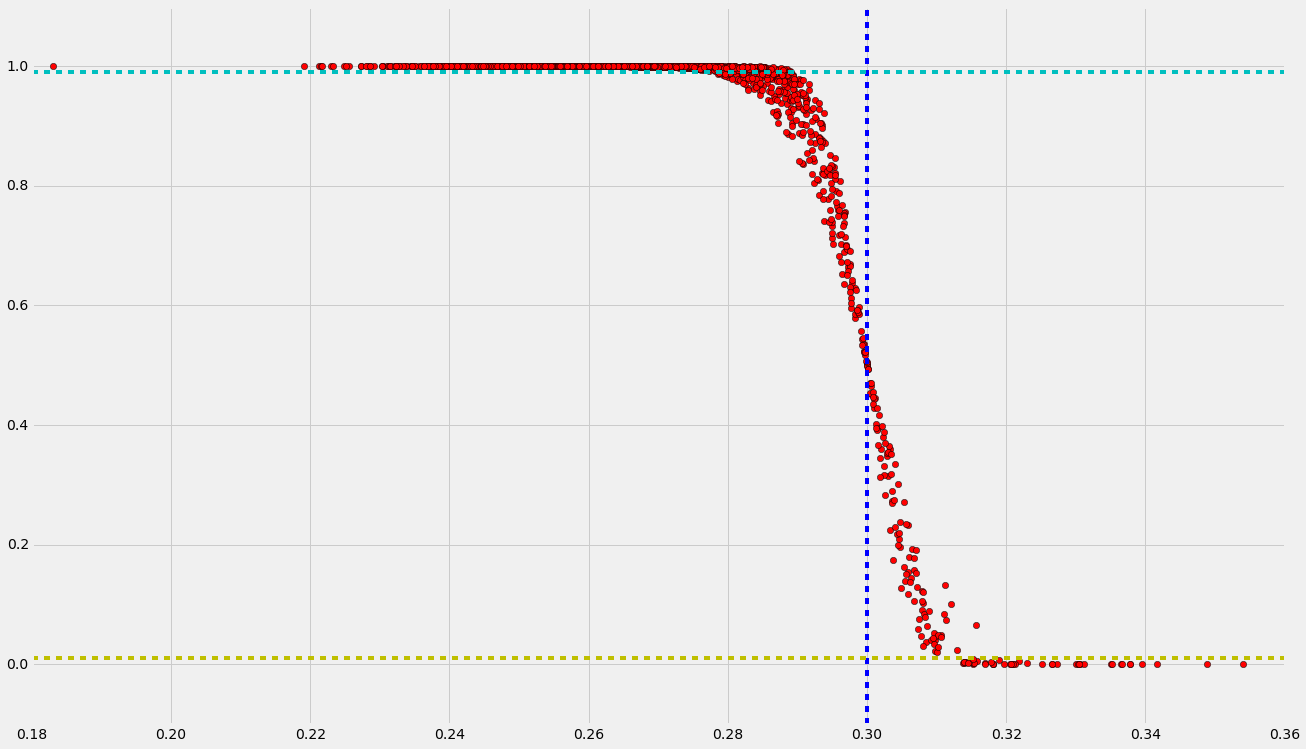

In [10]:
x = df_BA['Empirical Bayes Estimate'].values
y = df_BA['PEP'].values

plt.plot(x, y, 'ro')
plt.ylim([-0.1, 1.1])
plt.axvline(0.3, color = 'b', ls = 'dashed')
plt.axhline(0.99, color = 'c', ls = 'dashed')
plt.axhline(0.01, color = 'y', ls = 'dashed')
plt.show()

# All of the players below the yellow line have at least a 99% chance of getting into the Hall of Fame

# All of the players above the above the turquoise line have less than a 1% chance of getting into the Hall of Fame

____

# $\text{False Discovery Rate Control}$

### *False Discovery*: accidentally marking a player as a Hall of Fame candidate
### *False Discovery Rate*: the % of Hall of Fame candidates that shouldn't be there
### *False Discovery Rate Criterion*: a test to ensure that the False Discovery Rate is less than x%

# Our FDR Control: no more than 5% of the Hall of Fame should be included mistakenly

### First, let's look at the top candidates for the Hall of Fame

In [11]:
df_BA[df_BA['PEP']<0.01]

,playerID,Name,AB,H,average,Empirical Bayes Estimate,alpha1,beta1,PEP
80,alexada01,Dale Alexander,2450,811,0.331020,0.321834,928.983578,1957.546789,5.576190e-03
286,averiea01,Earl Averill,6353,2019,0.317803,0.314747,2136.983578,4652.546789,4.191558e-03
1208,cabremi01,Miguel Cabrera,7853,2519,0.320769,0.318110,2636.983578,5652.546789,1.749714e-04
1300,carewro01,Rod Carew,9315,3053,0.327751,0.325178,3170.983578,6580.546789,3.688769e-08
1586,clemero01,Roberto Clemente,9454,3000,0.317326,0.315249,3117.983578,6772.546789,4.989195e-04
1612,cochrmi01,Mickey Cochrane,5169,1652,0.319598,0.315757,1769.983578,3835.546789,5.260797e-03
1655,collied01,Eddie Collins,9949,3315,0.333199,0.330554,3432.983578,6952.546789,8.463643e-12
1675,combsea01,Earle Combs,5746,1866,0.324748,0.320902,1983.983578,4198.546789,1.853391e-04
1713,connoro01,Roger Connor,7794,2467,0.316526,0.314073,2584.983578,5645.546789,2.795577e-03
1967,cuyleki01,Kiki Cuyler,7161,2299,0.321045,0.318128,2416.983578,5180.546789,3.065533e-04


## We can be 99% confident that these 48 candidates deserve to be in the Hall of Fame
### If we take the sum of the values in the PEP column, we'll get the number of expected players in this pool of 48 that don't deserve to be in the Hall of Fame

In [12]:
df_BA[df_BA['PEP']<0.01]['PEP'].sum(), df_BA[df_BA['PEP']<0.01]['PEP'].sum()/48

(0.06138892198901988, 0.0012789358747712476)

### So 0.06 players out of the 48 don't deserve to be there for an FDR of 0.128%

## Now let's look at the top 100 batting averages

In [13]:
df_top_100 = df_BA.sort('PEP', ascending = 1).iloc[:100]
df_top_100

,playerID,Name,AB,H,average,Empirical Bayes Estimate,alpha1,beta1,PEP
3969,hornsro01,Rogers Hornsby,8173,2930,0.358497,0.354024,3047.983578,5561.546789,2.443075e-27
2125,delahed01,Ed Delahanty,7505,2596,0.345903,0.341746,2713.983578,5227.546789,5.446335e-16
4442,keelewi01,Willie Keeler,8591,2932,0.341287,0.337854,3049.983578,5977.546789,4.301882e-15
4149,jacksjo01,Shoeless Joe Jackson,4981,1772,0.355752,0.348864,1889.983578,3527.546789,5.180293e-15
4751,lajoina01,Nap Lajoie,9589,3242,0.338096,0.335143,3359.983578,6665.546789,1.524829e-14
3430,gwynnto01,Tony Gwynn,9288,3141,0.338178,0.335130,3258.983578,6465.546789,3.756769e-14
3692,heilmha01,Harry Heilmann,7787,2660,0.341595,0.337809,2777.983578,5445.546789,7.019527e-14
3028,gehrilo01,Lou Gehrig,8001,2721,0.340082,0.336471,2838.983578,5598.546789,2.431952e-13
3500,hamilbi01,Billy Hamilton,6268,2158,0.344288,0.339470,2275.983578,4428.546789,1.610818e-12
1655,collied01,Eddie Collins,9949,3315,0.333199,0.330554,3432.983578,6952.546789,8.463643e-12


### Let's calculate the FDR for these 100 players

In [14]:
df_top_100['PEP'].sum(), df_top_100['PEP'].sum()/100

(5.3105133833925136, 0.053105133833925136)

### So our FDR is 5.3%, or just above our criterion

### Note: Since we're taking the sum of the PEP values and then dividing by the number of players, this is the same as just taking the mean

In [15]:
df_top_100['PEP'].mean()

0.053105133833925136

# Therefore, to solve for how many we should allow in while satisfying our criterion of 5%, we can just take the cumulative mean and see where it crosses 5%

In [16]:
df_top_100['Cumulative Mean'] = df_top_100['PEP'].cumsum()/(np.arange(len(df_top_100))+1)

In [17]:
df_top_100.tail()

,playerID,Name,AB,H,average,Empirical Bayes Estimate,alpha1,beta1,PEP,Cumulative Mean
5996,morgaed01,Ed Morgan,2810,879,0.312811,0.307092,996.983578,2249.546789,0.190820,0.047021
147,altuvjo01,Jose Altuve,3361,1046,0.311217,0.306511,1163.983578,2633.546789,0.192387,0.048520
1139,burnsge02,George Burns,6573,2018,0.307014,0.304726,2135.983578,4873.546789,0.195261,0.050017
1284,canoro01,Robinson Cano,7210,2210,0.306519,0.304450,2327.983578,5318.546789,0.199161,0.051523
333,bakerfr01,Home Run Baker,5984,1838,0.307152,0.304645,1955.983578,4464.546789,0.209696,0.053105


## So the threshold  for the 5% criterion is between Jose Altuve and George Burns

### Let's look at how many players we'd include for different criterion levels

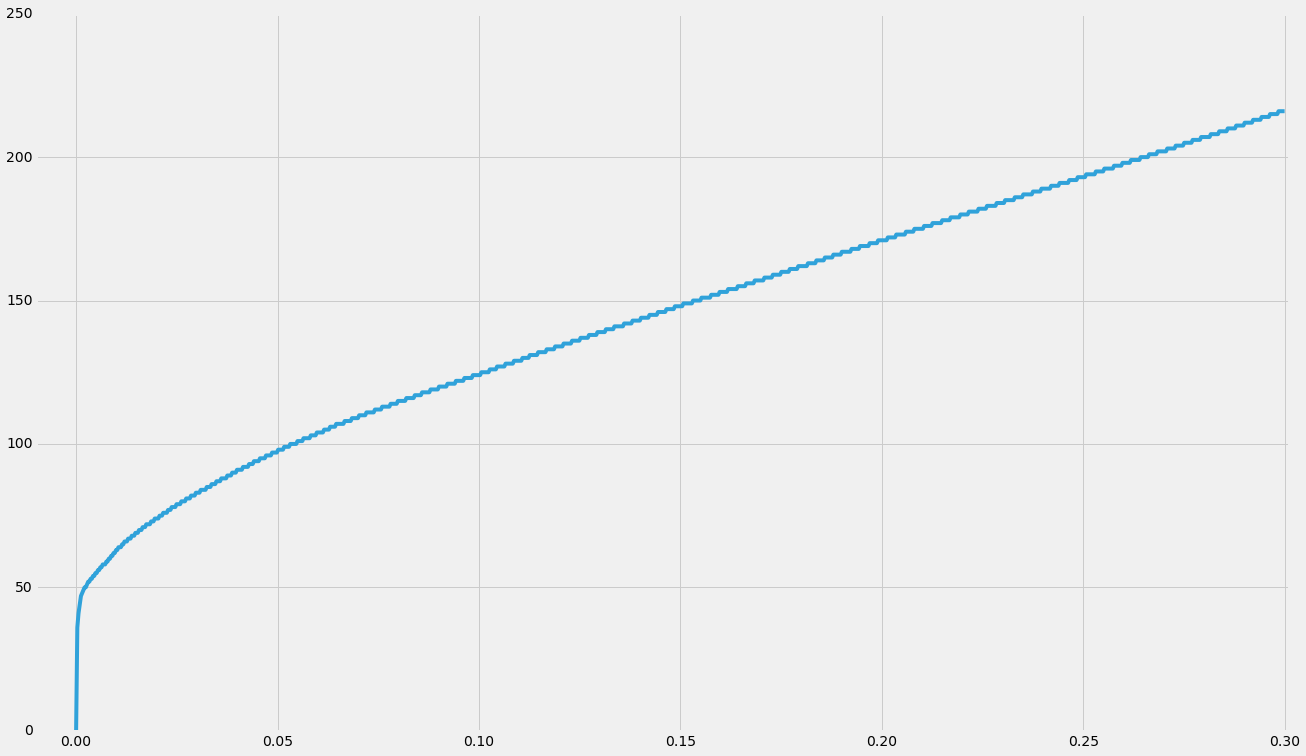

In [18]:
df_BA = df_BA.sort('PEP', ascending = 1)

df_BA['Cumulative Mean'] = df_BA['PEP'].cumsum()/(np.arange(len(df_BA))+1)

x = np.linspace(0, 0.3, 1000)

y = [len(df_BA[df_BA['Cumulative Mean']<=val]) for val in x]

plt.plot(x, y)
plt.xlim([-0.01, 0.301])
plt.show()

In [19]:
pd.DataFrame(zip(x,y)).iloc[[x for x in range(10)]+[x for x in range(990, 1000)]]

,0,1
0,0.000000,0
1,0.000300,36
2,0.000601,41
3,0.000901,44
4,0.001201,47
5,0.001502,48
6,0.001802,49
7,0.002102,50
8,0.002402,50
9,0.002703,51


## So if we set the FDR criterion at 0.15%, we'd only include 48 players

## If we set the FDR criterion at 29.8498%, we'd include 216 players

# SUMMARY

## *Step 1*: For each player's empirical beta distribution, calculate the area under the curve to the left of 0.300
- **Recall**: This is called the Posterior Error Probability aka PEP

## *Step 2*: Rank the players by PEP

## *Step 3*: Calculate the cumulative mean PEP values (False Discovery Rate)
- **Recall**: This gives the expected percentage of players that are admitted to the Hall of Fame by accident

In [20]:
df_BA.to_csv('df_BA.csv')